In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

**Data Loading / Preprocessing** 

i. Loading

In [395]:
df_test = pd.read_csv("df_test.csv")
df_train = pd.read_csv("df_train.csv")
df_noise_20 = pd.read_csv("df_train_noise20.csv")
df_noise_40= pd.read_csv("df_train_noise40.csv")
df_noise_60 = pd.read_csv("df_train_noise60.csv")

In [396]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          574 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        171 non-null    object 
 10  Embarked     710 non-null    object 
 11  Survived     712 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 66.9+ KB


In [397]:
df_train.shape

(712, 12)

In [398]:
df_train.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,299,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S,1
1,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
2,414,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S,0
3,542,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,0
4,557,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1


In [399]:
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            138
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          541
Embarked         2
Survived         0
dtype: int64

In [400]:
df_train = df_train.drop(columns=['Cabin','PassengerId','Name','Ticket'])

In [401]:
df_train.shape

(712, 8)

In [402]:
mean = np.around(df_train['Age'].mean(), decimals=1)
df_train['Age'].fillna(mean, inplace=True)

In [403]:
df_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Survived    0
dtype: int64

In [404]:
df_train.dropna(inplace=True)

In [405]:
df_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [406]:
df_train.shape

(710, 8)

In [407]:
y_train = df_train['Survived']
X_train = df_train.drop(['Survived'], axis=1)
print(X_train.shape)
print(y_train.shape)

(710, 7)
(710,)


In [408]:
y_test = df_test['Survived']
X_test = df_test.drop(['Survived'], axis=1)
print(X_test.shape)
print(y_test.shape)

(179, 8)
(179,)


ii. Data Visualization

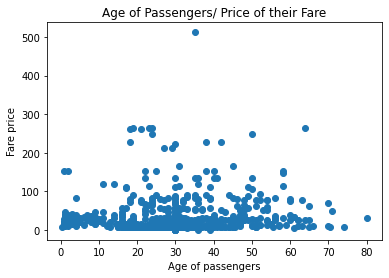

In [409]:
#Q1 for train data
plt.scatter(df_train.Age,df_train.Fare)
plt.xlabel('Age of passengers')
plt.ylabel('Fare price')
plt.title('Age of Passengers/ Price of their Fare')
plt.show()

In [410]:
#Q1 for train data
max_fare = max(df_train.Fare)
min_fare = min(df_train.Fare)
print("The highest fare price is ",max_fare,"and the lowest fare prices is ",min_fare)
mean_age = np.mean(df_train.Age)
mean_fare = np.mean(df_train.Fare)
print("Mean for Age is ",mean_age,"Mean for Fare is ",mean_fare)
oldest_passenger_age = max(df_train.Age)
print("The age of the oldest passenger :", oldest_passenger_age)

The highest fare price is  512.3292 and the lowest fare prices is  0.0
Mean for Age is  29.75267605633803 Mean for Fare is  32.52509295774648
The age of the oldest passenger : 80.0


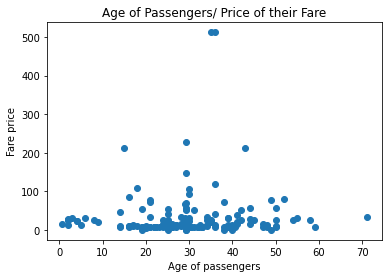

In [411]:
#Q1 for test data
plt.scatter(df_test.Age, df_test.Fare)
plt.xlabel('Age of passengers')
plt.ylabel('Fare price')
plt.title('Age of Passengers/ Price of their Fare')
plt.show()

In [412]:
#Q1 for test data
max_fare = max(df_test.Fare)
min_fare = min(df_test.Fare)
print("The highest fare price is ",max_fare,"and the lowest fare prices is ",min_fare)
mean_age = np.mean(df_test.Age)
mean_fare = np.mean(df_test.Fare)
print("Mean for Age is ",mean_age,"Mean for Fare is ",mean_fare)
oldest_passenger_age = max(df_test.Age)
print("The age of the oldest passenger :", oldest_passenger_age)

The highest fare price is  512.3292 and the lowest fare prices is  0.0
Mean for Age is  29.236928571428567 Mean for Fare is  30.397392737430174
The age of the oldest passenger : 71.0


In [413]:
#Q2 calculation
group_by_sex = df_train.groupby(['Pclass','Sex'])
survived_by_sex = group_by_sex['Survived'].sum()
survived_by_sex.name = 'Survived'
total_by_sex = group_by_sex['Survived'].size()
total_by_sex.name = 'Total'
survived_total_by_sex = pd.concat([survived_by_sex, total_by_sex], axis=1)

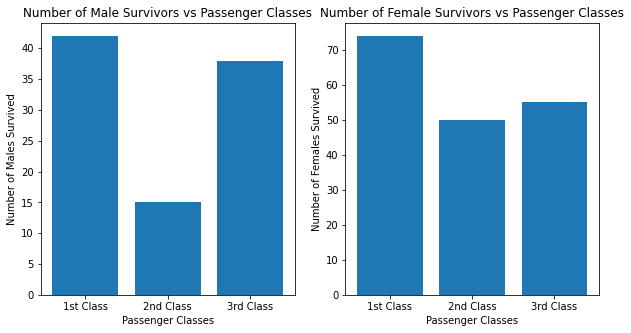

In [414]:
#Q2 visualization
male_survivors = [42, 15, 38]
female_survivors = [74, 50, 55]
passenger_classes = ['1st Class', '2nd Class', '3rd Class']
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].bar(passenger_classes, male_survivors)
axs[0].set_title('Number of Male Survivors vs Passenger Classes')
axs[0].set_xlabel('Passenger Classes')
axs[0].set_ylabel('Number of Males Survived')
axs[1].bar(passenger_classes, female_survivors)
axs[1].set_title('Number of Female Survivors vs Passenger Classes')
axs[1].set_xlabel('Passenger Classes')
axs[1].set_ylabel('Number of Females Survived')
plt.show()

In [415]:
#Q2 sub questions
group_by_male = df_train[df_train['Sex'] == 'male'].groupby(['Pclass'])
group_by_female = df_train[df_train['Sex'] == 'female'].groupby(['Pclass'])
survived_by_male = group_by_male['Survived'].sum()
survived_by_male.name = 'Survived Males'
survived_by_female = group_by_female['Survived'].sum()
survived_by_female.name = 'Survived Females'
survived_total_by_male = pd.concat([survived_by_male], axis=1)
survived_total_by_female = pd.concat([survived_by_female], axis=1)
display(survived_total_by_male,survived_total_by_female)
print('a: \n i. \nClass', survived_total_by_male['Survived Males'].idxmin(),' has the least number of survived males','And number of survived males are', survived_total_by_male['Survived Males'].min())
print('ii. \nClass', survived_total_by_female['Survived Females'].idxmin(),' has the least number of survived females','And number of survived females are', survived_total_by_female['Survived Females'].min())
print('b:\ni.\nClass', survived_total_by_male['Survived Males'].idxmax(),' has the greatest number of survived males','And number of survived males are', survived_total_by_male['Survived Males'].max())
print('ii.\nClass', survived_total_by_female['Survived Females'].idxmax(),' has the greatest number of survived females','And number of survived females are', survived_total_by_female['Survived Females'].max())

,Survived Males
Pclass,
1,42
2,15
3,38


,Survived Females
Pclass,
1,74
2,50
3,55


a: 
 i. 
Class 2  has the least number of survived males And number of survived males are 15
ii. 
Class 2  has the least number of survived females And number of survived females are 50
b:
i.
Class 1  has the greatest number of survived males And number of survived males are 42
ii.
Class 1  has the greatest number of survived females And number of survived females are 74


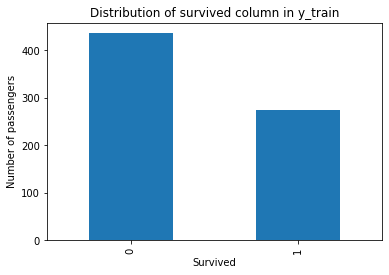

In [416]:
#Q3
counts = y_train.value_counts()
counts.plot.bar()
plt.title('Distribution of survived column in y_train')
plt.xlabel('Survived')
plt.ylabel('Number of passengers')
plt.show()

In [417]:
X_train = pd.get_dummies(X_train, columns = ['Sex','Embarked'])

In [418]:
X_train.shape

(710, 10)

iii. Data Scaling 

In [419]:
scaler = MinMaxScaler()
X_train[['Age','SibSp','Parch','Fare']] = scaler.fit_transform(X_train[['Age','SibSp','Parch','Fare']])

In [420]:
X_test[['Age','SibSp','Parch','Fare']] = scaler.transform(X_test[['Age','SibSp','Parch','Fare']])

**Modelling**

In [421]:
X_train = X_train.drop(columns=['Sex_female', 'Embarked_C'])

In [422]:
#model 1 using logistic regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

print(accuracy_score(y_pred_lr,y_test))

0.88268156424581


In [423]:
#model 2 using SVM
model_svm = LinearSVC()
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)

print(accuracy_score(y_pred_svm,y_test))

0.888268156424581


In [424]:
#spliting data for moisy datasets...
y_train_20 = df_noise_20['Survived']
X_train_20 = df_noise_20.drop(['Survived'], axis=1)
y_train_40 = df_noise_40['Survived']
X_train_40 = df_noise_40.drop(['Survived'], axis=1)
y_train_60 = df_noise_60['Survived']
X_train_60 = df_noise_60.drop(['Survived'], axis=1)

In [425]:
#model3 with noise20 using LR
model_lr_noise20 = LogisticRegression()
model_lr_noise20.fit(X_train_20, y_train_20)
y_pred_lr_noise20 = model_lr_noise20.predict(X_test)
print(accuracy_score(y_pred_lr_noise20,y_test))

0.7039106145251397


In [426]:
#model4 with noise40 using LR
model_lr_noise40 = LogisticRegression()
model_lr_noise40.fit(X_train_40, y_train_40)
y_pred_lr_noise40 = model_lr_noise40.predict(X_test)
print(accuracy_score(y_pred_lr_noise40,y_test))

0.6312849162011173


In [427]:
#model5 with noise60 using LR
model_lr_noise60 = LogisticRegression()
model_lr_noise60.fit(X_train_60, y_train_60)
y_pred_lr_noise60 = model_lr_noise60.predict(X_test)
print(accuracy_score(y_pred_lr_noise60,y_test))

0.39664804469273746


In [428]:
#model6 with noise20 usinf SVM
model_svm_noise20 = LinearSVC()
model_svm_noise20.fit(X_train_20, y_train_20)
y_pred_svm_noise20 = model_svm_noise20.predict(X_test)
print(accuracy_score(y_pred_svm_noise20,y_test))

0.6983240223463687


In [429]:
#model7 with noise40 usinf SVM
model_svm_noise40 = LinearSVC()
model_svm_noise40.fit(X_train_40, y_train_40)
y_pred_svm_noise40 = model_svm_noise40.predict(X_test)
print(accuracy_score(y_pred_svm_noise40,y_test))

0.664804469273743


In [430]:
#model8 with noise60 usinf SVM
model_svm_noise60 = LinearSVC()
model_svm_noise60.fit(X_train_60, y_train_60)
y_pred_svm_noise60 = model_svm_noise60.predict(X_test)
print(accuracy_score(y_pred_svm_noise60,y_test))

0.3743016759776536


In [431]:
def create_heatmap(cf_matrix):
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    return sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

**Evaluation**

Classification Report for Model Logistic Regression
Weighted F1 score:  0.882085857757772
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       113
           1       0.86      0.82      0.84        66

    accuracy                           0.88       179
   macro avg       0.88      0.87      0.87       179
weighted avg       0.88      0.88      0.88       179

AxesSubplot(0.125,0.125;0.62x0.755)


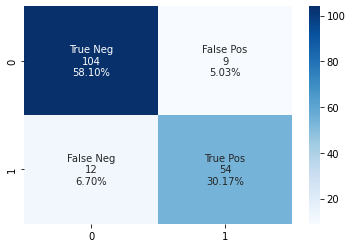

In [432]:
#model1
print("Classification Report for Model Logistic Regression")
print("Weighted F1 score: ", f1_score(y_test, y_pred_lr, average='weighted'))
print(classification_report(y_test, y_pred_lr))
cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(create_heatmap(cf_matrix_lr))

Classification Report for Model SVM
Weighted F1 score:  0.8878987326502763
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       113
           1       0.86      0.83      0.85        66

    accuracy                           0.89       179
   macro avg       0.88      0.88      0.88       179
weighted avg       0.89      0.89      0.89       179

AxesSubplot(0.125,0.125;0.62x0.755)


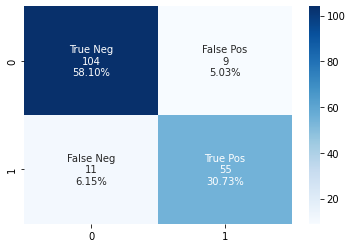

In [433]:
#model2
print("Classification Report for Model SVM")
print("Weighted F1 score: ", f1_score(y_test, y_pred_svm, average='weighted'))
print(classification_report(y_test, y_pred_svm))
cf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(create_heatmap(cf_matrix_svm))

Classification Report for Model Logistic Regression for noise 20
Weighted F1 score:  0.6327126769081186
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       113
           1       1.00      0.20      0.33        66

    accuracy                           0.70       179
   macro avg       0.84      0.60      0.57       179
weighted avg       0.80      0.70      0.63       179

AxesSubplot(0.125,0.125;0.62x0.755)


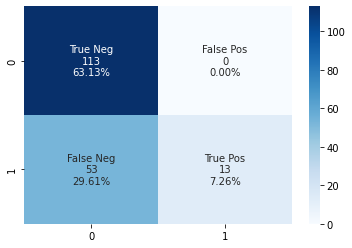

In [434]:
#model3
print("Classification Report for Model Logistic Regression for noise 20")
print("Weighted F1 score: ", f1_score(y_test, y_pred_lr_noise20, average='weighted'))
print(classification_report(y_test, y_pred_lr_noise20))
cf_matrix_lr_noise20 = confusion_matrix(y_test, y_pred_lr_noise20)
print(create_heatmap(cf_matrix_lr_noise20))

Classification Report for Model Logistic Regression for noise 40
Weighted F1 score:  0.4885972296625086
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       113
           1       0.00      0.00      0.00        66

    accuracy                           0.63       179
   macro avg       0.32      0.50      0.39       179
weighted avg       0.40      0.63      0.49       179

AxesSubplot(0.125,0.125;0.62x0.755)


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


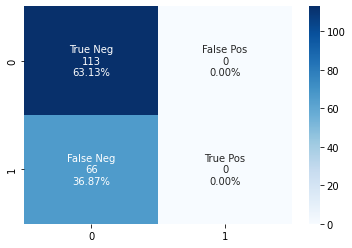

In [435]:
#model4
print("Classification Report for Model Logistic Regression for noise 40")
print("Weighted F1 score: ", f1_score(y_test, y_pred_lr_noise40, average='weighted'))
print(classification_report(y_test, y_pred_lr_noise40))
cf_matrix_lr_noise40 = confusion_matrix(y_test, y_pred_lr_noise40)
print(create_heatmap(cf_matrix_lr_noise40))

Classification Report for Model Logistic Regression for noise 60
Weighted F1 score:  0.27999500949582046
              precision    recall  f1-score   support

           0       0.73      0.07      0.13       113
           1       0.38      0.95      0.54        66

    accuracy                           0.40       179
   macro avg       0.55      0.51      0.33       179
weighted avg       0.60      0.40      0.28       179

AxesSubplot(0.125,0.125;0.62x0.755)


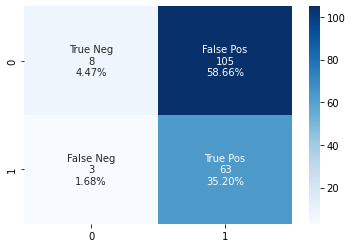

In [436]:
#model5
print("Classification Report for Model Logistic Regression for noise 60")
print("Weighted F1 score: ", f1_score(y_test, y_pred_lr_noise60, average='weighted'))
print(classification_report(y_test, y_pred_lr_noise60))
cf_matrix_lr_noise60 = confusion_matrix(y_test, y_pred_lr_noise60)
print(create_heatmap(cf_matrix_lr_noise60))

Classification Report for Model SVM for noise 20
Weighted F1 score:  0.6229879059487998
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       113
           1       1.00      0.18      0.31        66

    accuracy                           0.70       179
   macro avg       0.84      0.59      0.56       179
weighted avg       0.80      0.70      0.62       179

AxesSubplot(0.125,0.125;0.62x0.755)


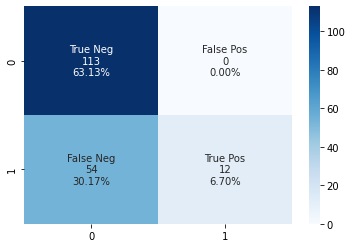

In [437]:
#model6
print("Classification Report for Model SVM for noise 20")
print("Weighted F1 score: ", f1_score(y_test, y_pred_svm_noise20, average='weighted'))
print(classification_report(y_test, y_pred_svm_noise20))
cf_matrix_svm_noise20 = confusion_matrix(y_test, y_pred_svm_noise20)
print(create_heatmap(cf_matrix_svm_noise20))

Classification Report for Model SVM for noise 40
Weighted F1 score:  0.5603000351603703
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       113
           1       1.00      0.09      0.17        66

    accuracy                           0.66       179
   macro avg       0.83      0.55      0.48       179
weighted avg       0.78      0.66      0.56       179

AxesSubplot(0.125,0.125;0.62x0.755)


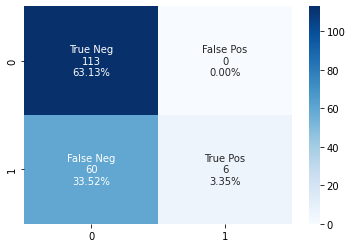

In [438]:
#model7
print("Classification Report for Model SVM for noise 40")
print("Weighted F1 score: ", f1_score(y_test, y_pred_svm_noise40, average='weighted'))
print(classification_report(y_test, y_pred_svm_noise40))
cf_matrix_svm_noise40 = confusion_matrix(y_test, y_pred_svm_noise40)
print(create_heatmap(cf_matrix_svm_noise40))

Classification Report for Model SVM for noise 60
Weighted F1 score:  0.26807748360456646
              precision    recall  f1-score   support

           0       0.53      0.07      0.12       113
           1       0.36      0.89      0.51        66

    accuracy                           0.37       179
   macro avg       0.45      0.48      0.32       179
weighted avg       0.47      0.37      0.27       179

AxesSubplot(0.125,0.125;0.62x0.755)


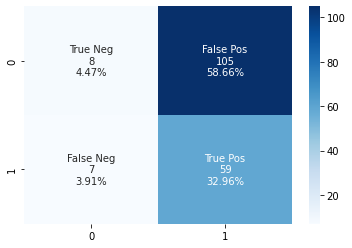

In [439]:
#model8
print("Classification Report for Model SVM for noise 60")
print("Weighted F1 score: ", f1_score(y_test, y_pred_svm_noise60, average='weighted'))
print(classification_report(y_test, y_pred_svm_noise60))
cf_matrix_svm_noise60 = confusion_matrix(y_test, y_pred_svm_noise60)
print(create_heatmap(cf_matrix_svm_noise60))